# Chapter 5: Random Variables, Probability, Distributions


Let's simulate tossing a coin 10 times

## Multiple Distributions

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# for 3D plots
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats


In [67]:
np.random.seed(87654321)
coindomain = np.array([0,1])
coinsupport = np.array([0,1])
coinprob = np.array([.5,.5])
diesupport = np.array(range(1,7))
dieprob = np.array([1/6]*6)
coinedf = np.random.choice(coinsupport, size=10000, replace=True, p=coinprob)
dieedf = np.random.choice(diesupport, size=10000, replace=True, p=dieprob)

In [68]:
# crosstab
np.bincount(coinedf) / len(coinedf) # coinedf_table = np.vstack((coinedf_counts, coinedf_prob)).T

array([0.5084, 0.4916])

In [69]:
np.bincount(dieedf) / len(dieedf)

array([0.    , 0.1739, 0.1608, 0.1634, 0.1623, 0.1711, 0.1685])

In [70]:
pd.crosstab(coinedf, dieedf, rownames=['Coins'], colnames=['Dies']) / len(coinedf)

Dies,1,2,3,4,5,6
Coins,,,,,,
0,0.0875,0.0821,0.0848,0.0834,0.0879,0.0827
1,0.0864,0.0787,0.0786,0.0789,0.0832,0.0858


In [71]:
Transactions = pd.read_csv('../data/Transactions.csv')
np.bincount(Transactions['Toothbrush']) / len(Transactions['Toothbrush'])

array([0.92784993, 0.07215007])

In [72]:
np.bincount(Transactions['Perfume']) / len(Transactions['Perfume'])

array([0.90681661, 0.09318339])

In [73]:
pd.crosstab(Transactions['Toothbrush'], Transactions['Perfume']) / len(Transactions['Toothbrush'])

Perfume,0,1
Toothbrush,,
0,0.857911,0.069939
1,0.048905,0.023245


## Univariate and Multivariate Distributions

In [74]:
M = np.array([4,10])
S = np.array([[2,1],[1,3]])
x = np.random.multivariate_normal(M, S, 10)
x

array([[ 4.71377233,  9.61154606],
       [ 3.40777927,  9.59450296],
       [ 4.52847425,  8.49964337],
       [ 4.58181931, 10.63656782],
       [ 6.00786783,  9.28934248],
       [ 5.76156183, 10.89942593],
       [ 3.68797012, 11.1444203 ],
       [ 2.29071726,  8.3847295 ],
       [ 2.66167864,  9.00609472],
       [ 5.19767633, 10.39204891]])

In [75]:
np.corrcoef(x[:,0], x[:,1])[0,1] # [0,1] is the first row and first column of the correlation matrix

0.418136736581997

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_20096/3745611776.py:11: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


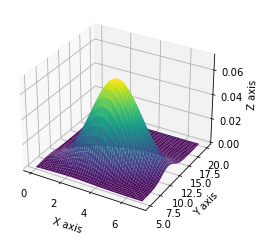

In [76]:
#Create grid and multivariate normal
x = np.linspace(0, 7, 500)
y = np.linspace(5, 20,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = stats.multivariate_normal(M, S)

#Make a 3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

## Transformations and Convolutions

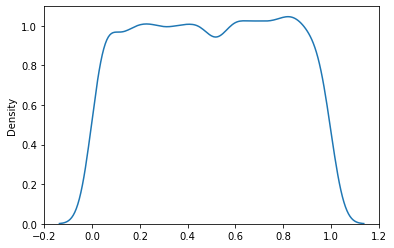

In [77]:
u1 = np.random.uniform(0,1,10000)
sns.kdeplot(u1)
plt.show()

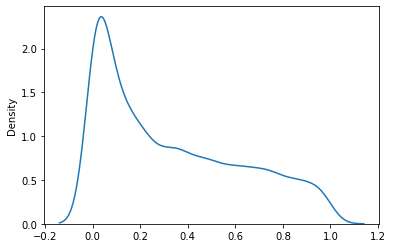

In [78]:
u2 = u1 ** 2
sns.kdeplot(u2)
plt.show()

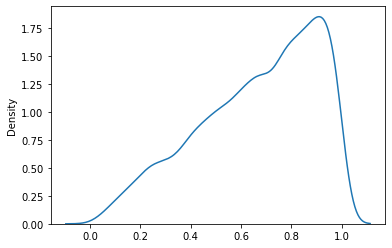

In [79]:
u3 = np.sqrt(u1)
sns.kdeplot(u3)
plt.show()


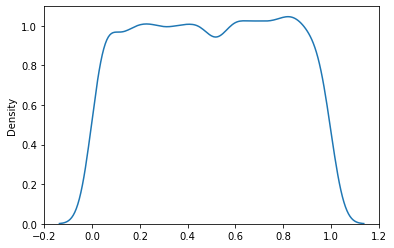

In [80]:
n1 = np.random.normal(0,1,10000)
sns.kdeplot(u1)
plt.show()

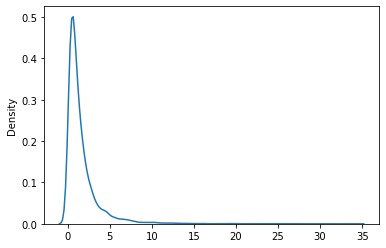

In [81]:
n2 = np.exp(n1)
sns.kdeplot(n2)
plt.show()

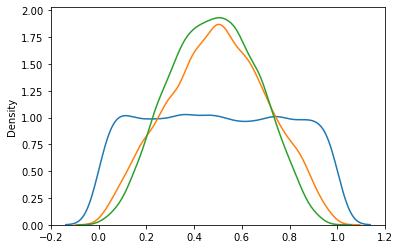

In [82]:
newdist = np.random.uniform(0,1,10000)
newdist = (newdist-min(newdist))/max(newdist)
sns.kdeplot(newdist)
for i in range(1,3):
    newdist = newdist + np.random.uniform(0,1,10000)
    newdist = (newdist-min(newdist))/max(newdist)
    sns.kdeplot(newdist, color=sns.color_palette()[i])
plt.show()

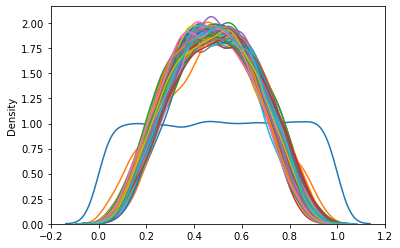

In [83]:
newdist = np.random.uniform(0,1,10000)
newdist = (newdist-min(newdist))/max(newdist)
sns.kdeplot(newdist)
for i in range(1,100):
    newdist = newdist + np.random.uniform(0,1,10000)
    newdist = (newdist-min(newdist))/max(newdist)
    sns.kdeplot(newdist, color=sns.color_palette()[i%10])
plt.show()


## Sampling Distributions

In [84]:
women = pd.read_csv('../data/women.csv')

In [85]:
women['weight'].mean()

136.73333333333332

In [86]:
women['weight'].std()

15.49869426143776

In [87]:
np.random.seed(87654321)
s = np.random.choice(a=women['weight'], size=5, replace=True)
s.mean()

142.4

In [88]:
def f1():
  s = np.random.choice(a=women['weight'], size=5, replace=False)
  return s.mean()
samplingdist = np.array([f1() for i in range(10000)])

In [89]:
samplingdist.min()

120.2

In [90]:
samplingdist.max()

154.6

In [91]:
samplingdist.mean()

136.77574

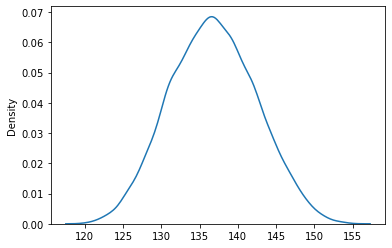

In [92]:
sns.kdeplot(samplingdist)
plt.show()

In [93]:
def f2():
  s2 = np.random.choice(a=women['weight'], size=5, replace=False)
  return s2.mean()
samplingdist2 = np.array([f2() for i in range(10000)])

In [94]:
women['weight'].median()

135.0

In [95]:
samplingdist2.mean()

136.72456

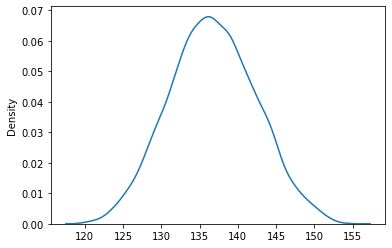

In [96]:
sns.kdeplot(samplingdist2)
plt.show()

In [97]:
def f3():
    s3 = np.random.choice(a=women['weight'], size=5, replace=False)
    return np.quantile(s3, 0.25)
samplingdist3 = np.array([f3() for i in range(10000)])

In [98]:
women['weight'].quantile(0.25)

124.5

In [99]:
samplingdist3.mean()

127.1985

## Start Tillman

In [100]:
import numpy as np
coindomain = [0,1]
coinprob = [.5,.5]
np.random.choice(coindomain, size=10, replace=True, p=coinprob) 

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1])

Now, let's simulate rolling a die 15 times. 

In [101]:
diedomain = range(1,7)
dieprob = np.repeat(1/6,6)
np.random.choice(diedomain, size = 15, replace = True, p = dieprob)

array([3, 2, 2, 2, 6, 3, 3, 2, 3, 6, 2, 3, 1, 4, 2])

Let's simulate 5 coin tosses, i.e. draw 5 sample values, and calculate the relative frequencies:

In [102]:
import pandas as pd
res1 = np.random.choice(coindomain, size=5, replace=True, p=coinprob) 
pd.DataFrame(data=res1).value_counts(normalize=True)

1    0.6
0    0.4
dtype: float64

And now the same but with 1000 draws:

In [103]:
res1 = np.random.choice(coindomain, size=1000, replace=True, p=coinprob) 
pd.DataFrame(data=res1).value_counts(normalize=True)

1    0.514
0    0.486
dtype: float64